## Data Augmentation Test Notebook

The goal of this notebook is to check the implementation of various data augmentation functions in **augmentation.py**.

Images provided here are only for reference. You may get different images as a result of difference in the random values used in the functions. Make sure that you get a different output each time you rerun the same cell.


### IMPORTANT 

Complete the missing code in augmentation.py from the checklist given below before running the notebook.
In this notebook, you can test each function immediately after implementation.

Functions TO DO :

- [ ] Step 2a: Class Rotate  ➜ \_\_call\_\_
- [ ] Step 2b: Class GaussianNoise  ➜ \_\_call\_\_
- [ ] Step 2c: Class ColRec  ➜ \_\_call\_\_
- [ ] Step 2d: Class ZoomIn  ➜ \_\_call\_\_
- [ ] Step 2e: Class ZoomOut  ➜ \_\_call\_\_

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Compose


from data.image_dataset import ImageDataset,convert_tensor_to_numpy
from utils.augmentation import VerticalFlip, Rotate,ZoomIn, ZoomOut, ColRec, GaussianNoise,GaussianBlur
from utils.experiment import read_config,Experiment
from utils.visualization import display_input


In [3]:
# Helper function that creates dataloader for testing various augmentation operations

def create_aug_test_dataloader(exp,augmentation_operation):
    
    dataset =ImageDataset(dataset_name='SimSet1',
                          size=1,
                          cfg_path=exp.params['cfg_path'],
                          augmentation=augmentation_operation)
    
    loader = torch.utils.data.DataLoader(dataset=dataset,batch_size=1,shuffle=False)
    
    return loader

In [4]:
# Helper function for displaying first image in each minibatch

def display_img(loader):
    for i, (images, labels) in enumerate(loader):
    
        # Select first image from minibatch
        image = images[0]
        label = labels[0]

        # Convert to numpy
        image = convert_tensor_to_numpy(image)
        label = convert_tensor_to_numpy(label)

        # Plot the arrays
        display_input(image,label)
    

In [5]:
# Creating an experiment to test the augmentation implementation.
exp = Experiment(name='TestExp', train=True, overwrite=True)

### No Augmentation Applied



<center><b>Reference Image</b></center>
<img src="./tests/figs/noaug.png" />


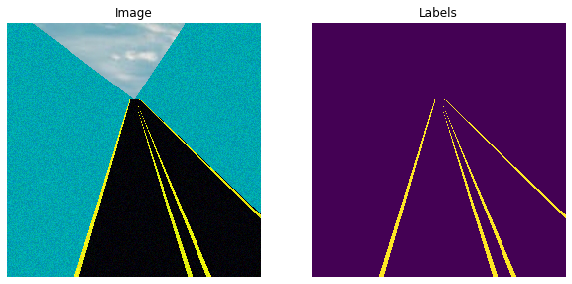

In [6]:
augmentation_operation=None

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied: VerticalFlip




<center><b>Reference Image</b></center>
<img src="./tests/figs/vflip.png" />


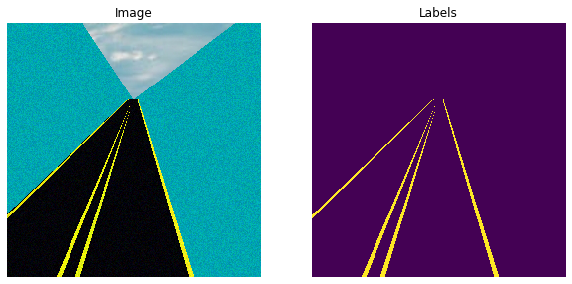

In [7]:
augmentation_operation=VerticalFlip(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:Gaussian Blur





<center><b>Reference Image</b></center>
<img src="./tests/figs/blur.png" />


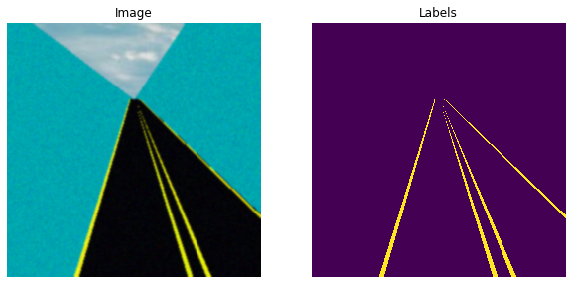

In [8]:
augmentation_operation=GaussianBlur(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied: Rotate



<center><b>Reference Image</b></center>
<img src="./tests/figs/rot.png" />


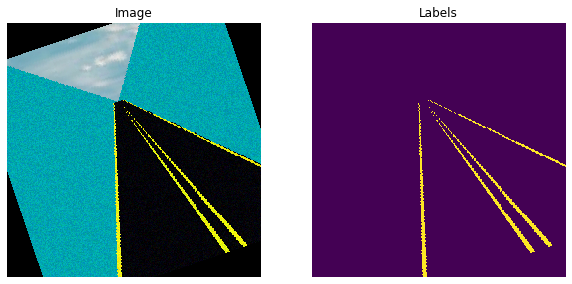

In [9]:
augmentation_operation=Rotate(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied: VerticalFlip; Rotate
 Using the `torchvision.transforms.Compose` to combine multiple augmentations.
 
 
 


<center><b>Reference Image</b></center>
<img src="./tests/figs/rot_flip.png" />


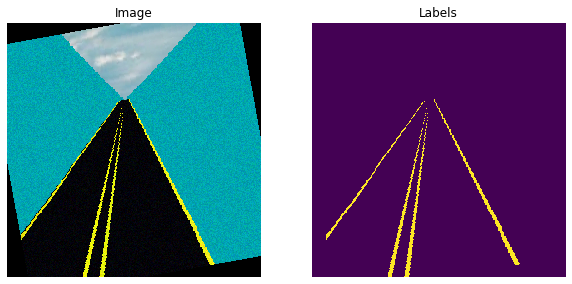

In [10]:
augmentation_operation=Compose([VerticalFlip(probability=1),Rotate(probability=1)])

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:ZoomIn





<center><b>Reference Image</b></center>
<img src="./tests/figs/zoomin.png" />


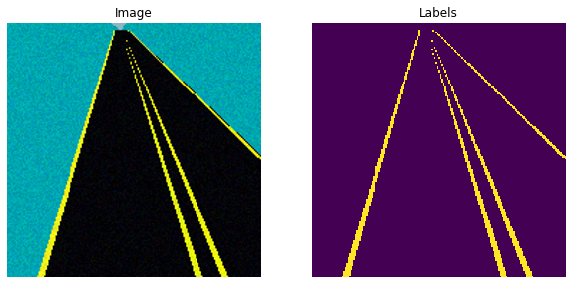

In [11]:
augmentation_operation=ZoomIn(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:ZoomOut





<center><b>Reference Image</b></center>
<img src="./tests/figs/zoomout.png" />


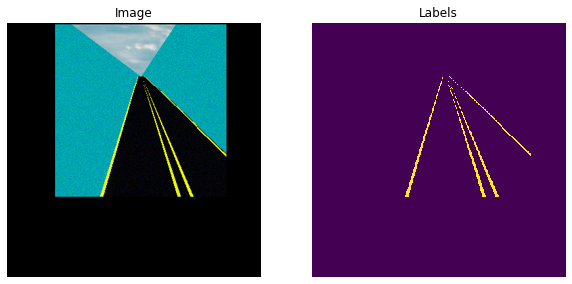

In [12]:
augmentation_operation=ZoomOut(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:ColRec





<center><b>Reference Image</b></center>
<img src="./tests/figs/colrec.png" />


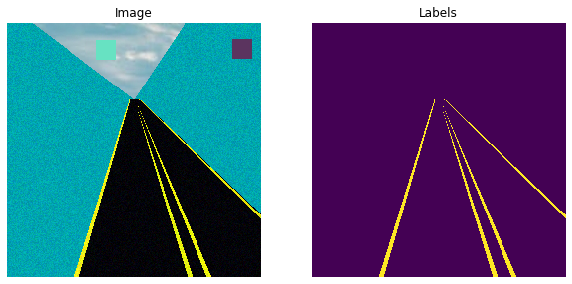

In [13]:
augmentation_operation=ColRec(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:Gaussian Noise





<center><b>Reference Image</b></center>
<img src="./tests/figs/gaussian.png" />


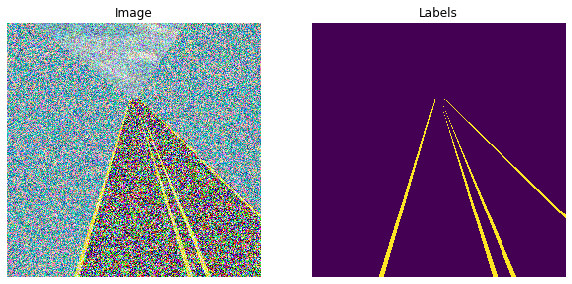

In [14]:
augmentation_operation=GaussianNoise(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)